In [1]:
# remove for package, for plotting purposes only
Sys.setenv(RGL_USE_NULL = TRUE) 
library(rgl)

library(lidR)
library(terra)
library(sf)
library(glue)

terra 1.7.18

Linking to GEOS 3.11.2, GDAL 3.6.3, PROJ 9.2.0; sf_use_s2() is TRUE


Attaching package: ‘sf’


The following object is masked from ‘package:lidR’:

    st_concave_hull



Attaching package: ‘glue’


The following object is masked from ‘package:terra’:

    trim




In [2]:
citation('lidR')


To cite package lidR in publications use both:

  Roussel, J.R., Auty, D., Coops, N. C., Tompalski, P., Goodbody, T. R.
  H., Sánchez Meador, A., Bourdon, J.F., De Boissieu, F., Achim, A.
  (2020). lidR : An R package for analysis of Airborne Laser Scanning
  (ALS) data. Remote Sensing of Environment, 251 (August), 112061.
  <doi:10.1016/j.rse.2020.112061>.

  Jean-Romain Roussel and David Auty (2023). Airborne LiDAR Data
  Manipulation and Visualization for Forestry Applications. R package
  version 4.0.3. https://cran.r-project.org/package=lidR

To see these entries in BibTeX format, use 'print(<citation>,
bibtex=TRUE)', 'toBibtex(.)', or set
'options(citation.bibtex.max=999)'.


## nDSM creation

In [ ]:
# read lasfile
LASFILE <- "<input las file>"
las <- readLAS(LASFILE)

# classify ground
mycsf <- csf(sloop_smooth = TRUE, class_threshold = 1, cloth_resolution = 1, time_step = 1)
las <- classify(las,mycsf)

# filter ground points
gnd <- filter_ground(las)

# NOTE: raterize_terrain needed las to have ground classification 
dtm_tin <- rasterize_terrain(las, res =1, algorithm = tin())

# create nDSM
nlas <-las - dtm_tin


In [2]:
nlas <- readLAS("Serigasawa/ndsm.las")

Warning message:
“Invalid data: 46277347 points with a return number equal to 0 found.”
Warning message:
“Invalid data: 46277347 points with a number of returns equal to 0 found.”


In [4]:
print(nlas)

class        : LAS (v1.2 format 2)
memory       : 2.1 Gb 
extent       : 68339.32, 68688.07, 181306.9, 181688.7 (xmin, xmax, ymin, ymax)
coord. ref.  : NA 
area         : 68832 units²
points       : 46.28 million points
density      : 672.32 points/units²


In [9]:
xmin <- 68340
xmax <- 68688
ymin <- 181307
ymax <- 181688

xmid <- xmin + ((xmax-xmin)/2)
ymid <- ymin + ((ymax-ymin)/2)
print(xmid)
print(ymid)

[1] 68514
[1] 181497.5


In [10]:
roi <- clip_circle(nlas, x = xmid, y = ymid, radius = 60)
plot(roi, bg = "white", size =4)

In [11]:
writeLAS(roi, "Serigasawa/roi.las")

## tree top identification

In [3]:
library(terra)
st_crs(nlas) <- 30169

terra 1.7.18



In [43]:
chm <- rasterize_canopy(nlas, res = 0.5, algorithm = p2r(subcircle =0.15),pkg='terra')
# w <- matrix(1,3,3)
# smoothed <- terra::focal(chm, w, fun = mean, na.rm = TRUE)

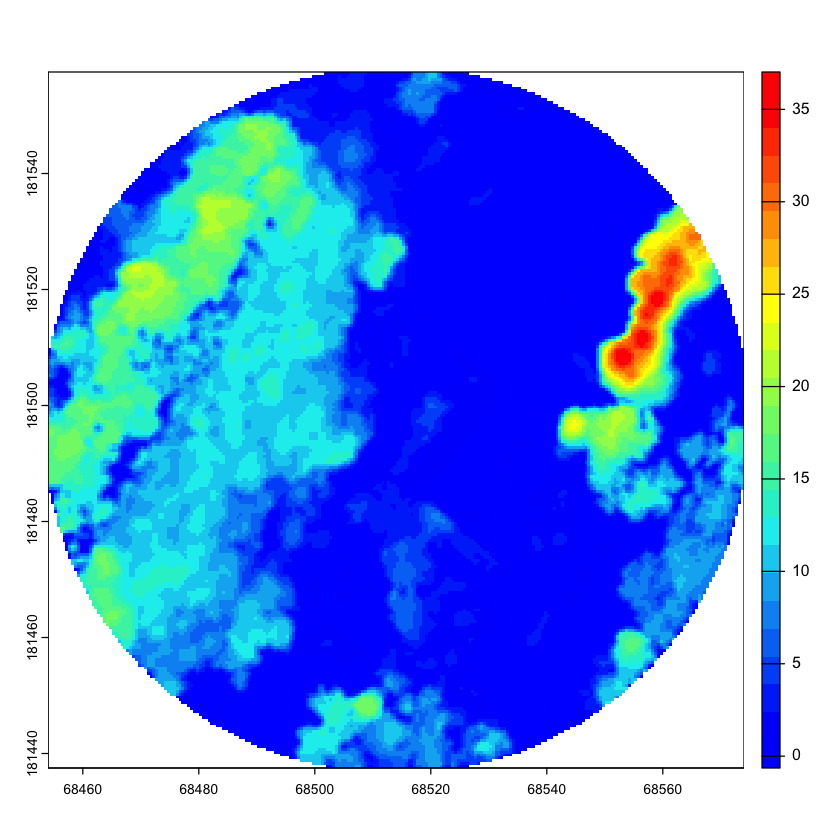

In [17]:
col <- height.colors(25)
plot(smoothed, col=col)

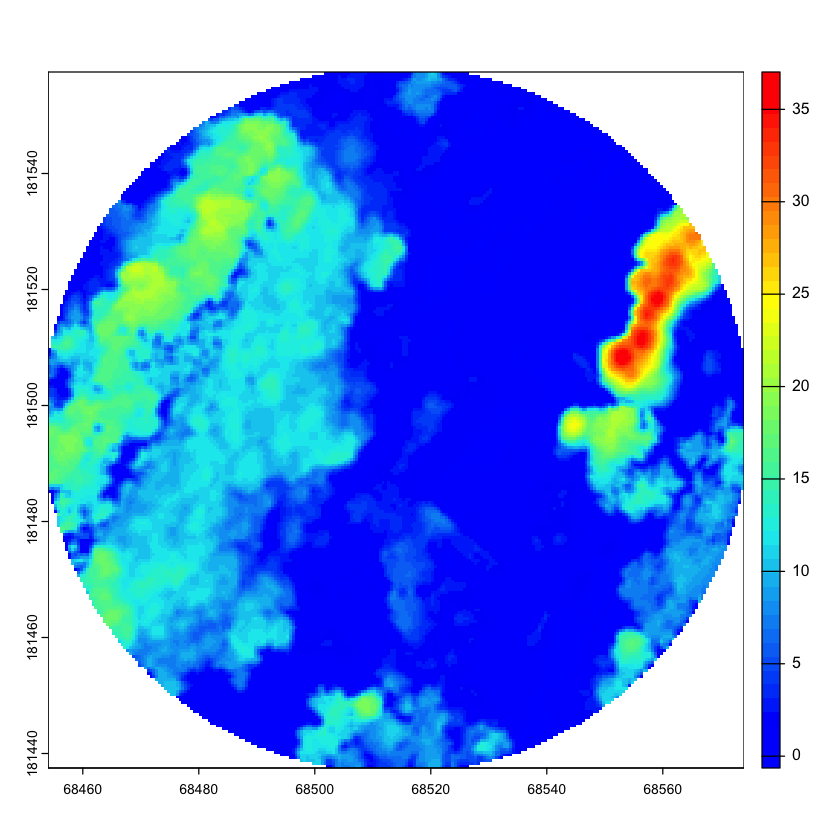

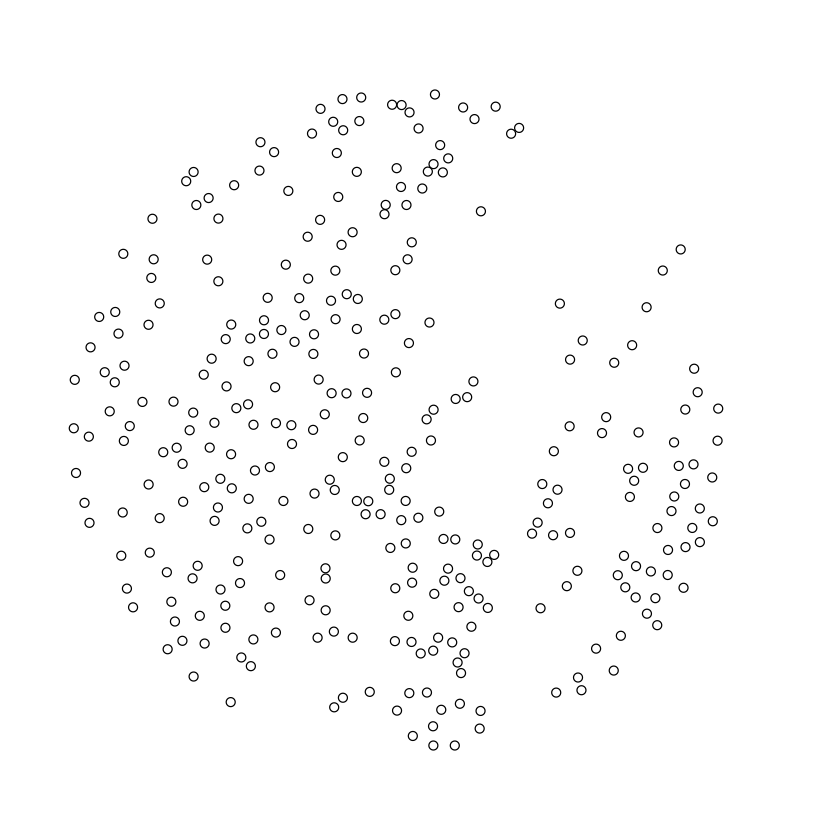

In [34]:
ttops <- locate_trees(roi, lmf(linear_ws))
plot(smoothed, col = height.colors(50))
plot(sf::st_geometry(ttops, add = TRUE, pch = 3))

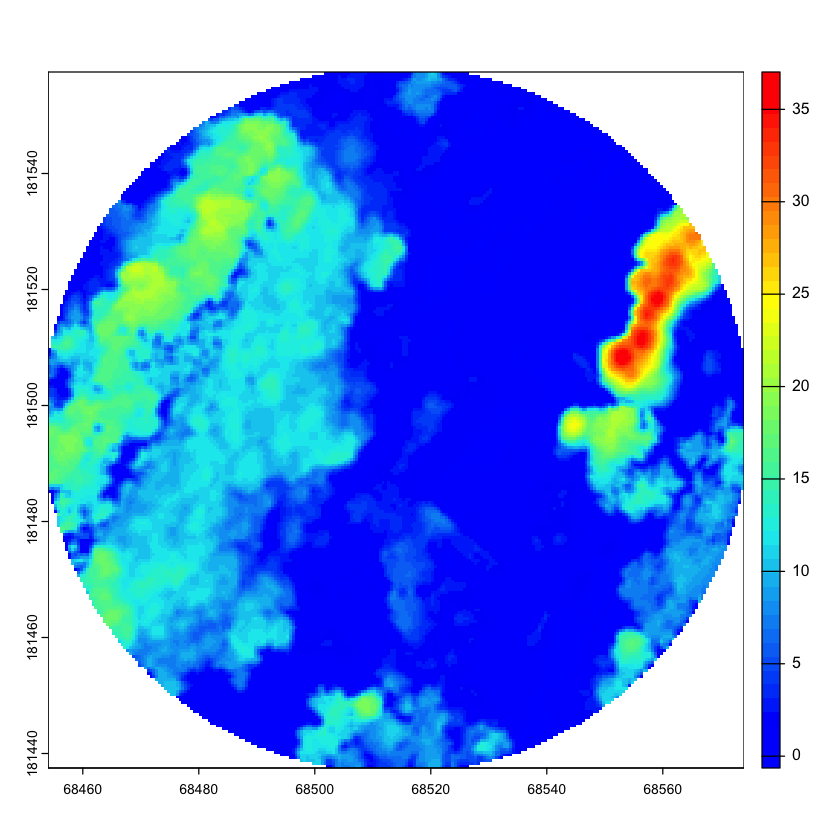

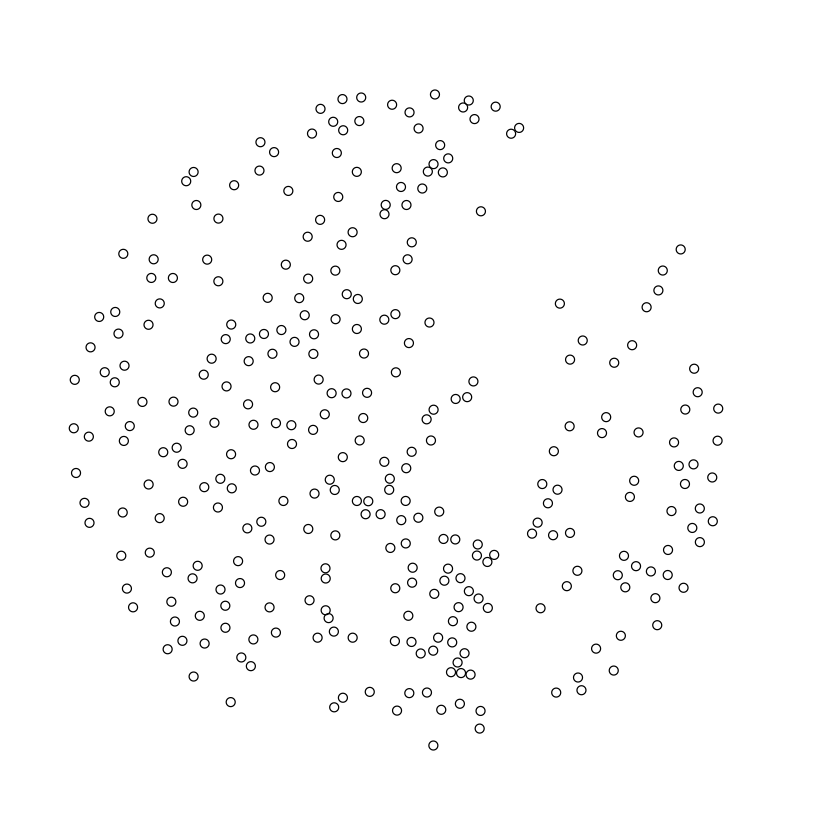

In [30]:
plot(smoothed, col = height.colors(50))
plot(sf::st_geometry(ttops, add = TRUE, pch = 3))

In [68]:
ttops

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

,treeID,Z,geometry
,<int>,<dbl>,<POINT [m]>
1,1,8.31,POINT Z (68514.17 181555.2 ...
2,2,8.31,POINT Z (68468.7 181534.5 8...
3,3,10.84,POINT Z (68560.83 181460.3 ...
4,4,17.85,POINT Z (68571.84 181494 17...
5,5,14.62,POINT Z (68501.87 181445.3 ...
6,6,9.06,POINT Z (68484.92 181454.4 ...
7,7,14.95,POINT Z (68503.46 181447.1 ...
8,8,6.55,POINT Z (68516.19 181470.8 ...
9,9,9.65,POINT Z (68504.11 181502.6 ...


### Segmentation of trees

In [45]:
st_crs(roi) <- 30169
st_crs(ttops) <- 30169
print(roi)

class        : LAS (v1.2 format 2)
memory       : 399.2 Mb 
extent       : 68454.01, 68573.99, 181437.5, 181557.5 (xmin, xmax, ymin, ymax)
coord. ref.  : Tokyo / Japan Plane Rectangular CS IX 
area         : 11756 m²
points       : 9.51 million points
density      : 809.23 points/m²


In [46]:
algo <- dalponte2016(smoothed, ttops)
seg_las <- segment_trees(roi, algo)

In [48]:
plot(seg_las, bg="white", size=4, color="treeID")

In [49]:
tree10 <-filter_poi(seg_las, treeID == 10)
plot(tree10, size = 8, bg='white')

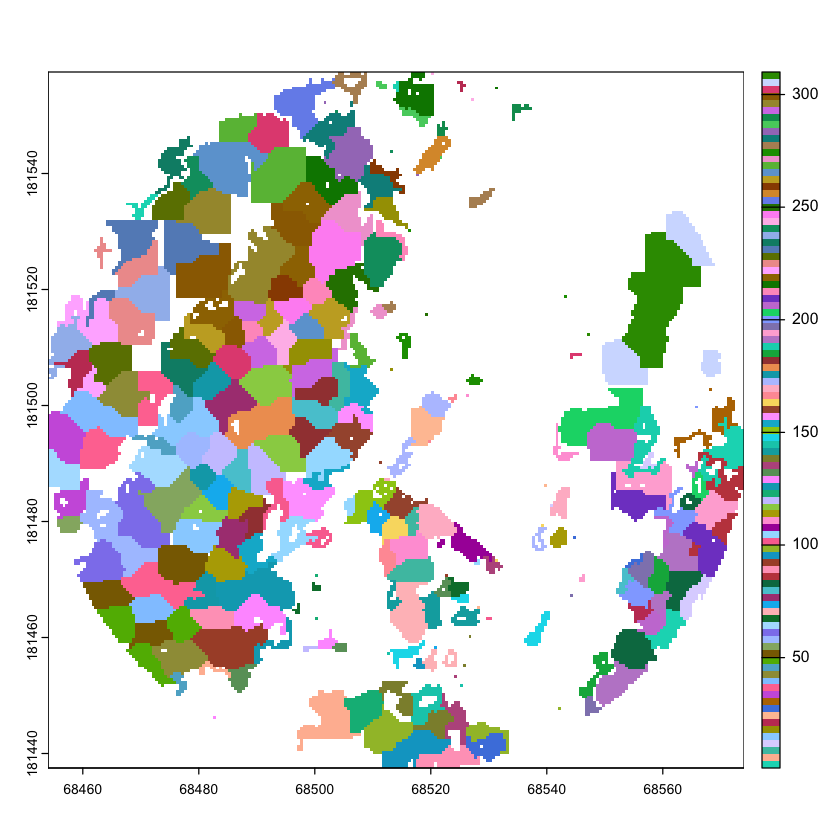

In [50]:
crowns <- algo()
plot(crowns, col = pastel.colors(100))

In [52]:
writeLAS(seg_las, 'Serigasawa/segments.las')

#### Watershed algo

In [60]:
algo = watershed(chm,th=4)
seg_las = segment_trees(roi,algo)

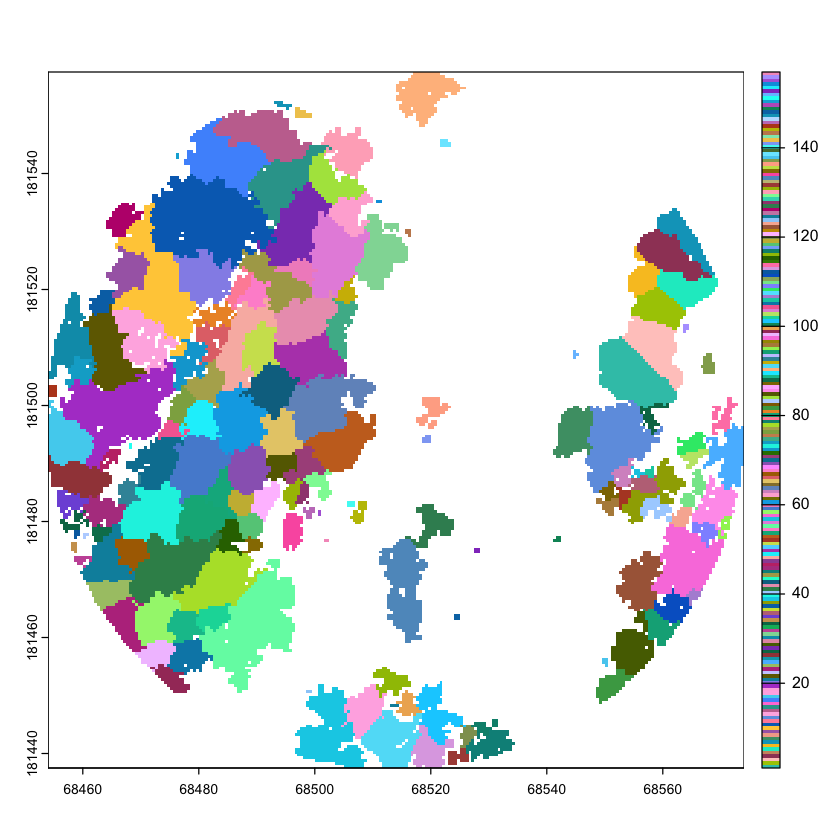

In [66]:
crowns <- algo()
plot(crowns, col = pastel.colors(200))

In [64]:
trees = filter_poi(seg_las, !is.na(treeID))

In [67]:
writeLAS(trees, 'Serigasawa/segments_watershedR.las')

## Tree height

In [3]:
trees <- readLAS('Serigasawa/segments_watershedR.las')

Warning message:
“Invalid data: 5634503 points with a return number equal to 0 found.”
Warning message:
“Invalid data: 5634503 points with a number of returns equal to 0 found.”


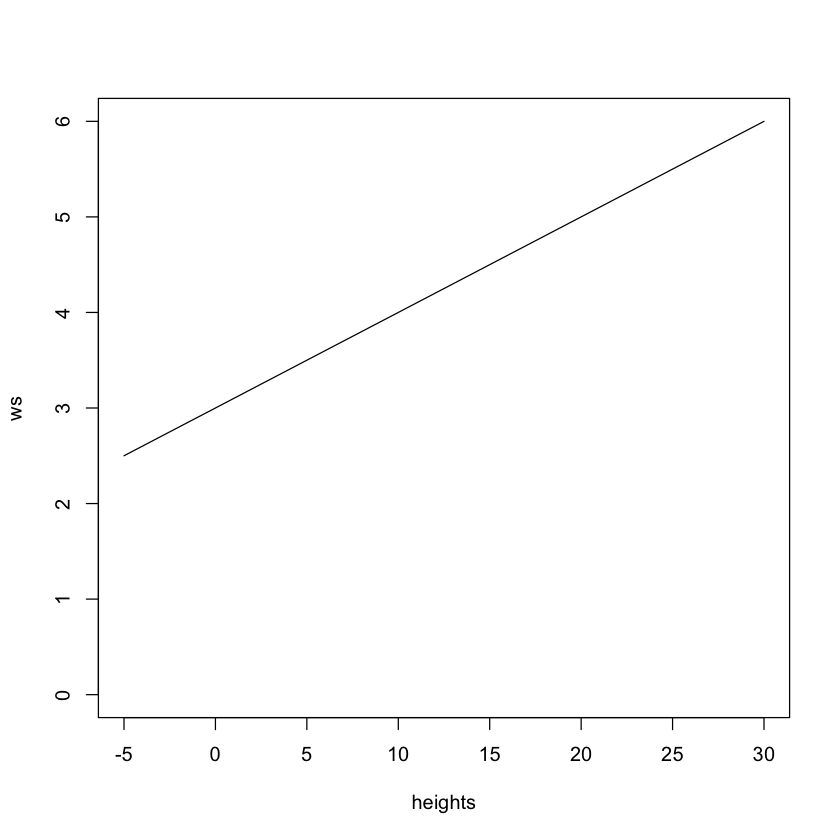

In [5]:
# window size for tree top detection
linear_ws <- function(x) {x*0.1 + 3}

heights <- seq(-5,30,0.5)
ws <- linear_ws(heights)
plot(heights, ws, type = 'l', ylim = c(0,6))

In [6]:
ttops_w <- locate_trees(trees, lmf(linear_ws))
#plot(chm, col = height.colors(50))
#plot(sf::st_geometry(ttops_w, add = TRUE, pch = 3))

In [7]:
print(ttops_w)

Simple feature collection with 223 features and 2 fields
Attribute-geometry relationship: 2 constant, 0 aggregate, 0 identity
Geometry type: POINT
Dimension:     XYZ
Bounding box:  xmin: 68454.34 ymin: 181438.3 xmax: 68571.96 ymax: 181557.2
Projected CRS: Tokyo / Japan Plane Rectangular CS IX
First 10 features:
   treeID     Z                       geometry
1       1  8.31 POINT Z (68514.17 181555.2 ...
2       2  8.31 POINT Z (68468.7 181534.5 8...
3       3 10.84 POINT Z (68560.83 181460.3 ...
4       4 17.85 POINT Z (68571.84 181494 17...
5       5 14.62 POINT Z (68501.87 181445.3 ...
6       6  9.06 POINT Z (68484.92 181454.4 ...
7       7 14.95 POINT Z (68503.46 181447.1 ...
8       8  6.55 POINT Z (68516.19 181470.8 ...
9       9  9.65 POINT Z (68504.11 181502.6 ...
10     10 10.39 POINT Z (68558.23 181489 10...


In [12]:
ttops_w_z <- sf::st_zm(ttops_w)
print(ttops_w_z)

Simple feature collection with 223 features and 2 fields
Attribute-geometry relationship: 2 constant, 0 aggregate, 0 identity
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 68454.34 ymin: 181438.3 xmax: 68571.96 ymax: 181557.2
Projected CRS: Tokyo / Japan Plane Rectangular CS IX
First 10 features:
   treeID     Z                  geometry
1       1  8.31 POINT (68514.17 181555.2)
2       2  8.31  POINT (68468.7 181534.5)
3       3 10.84 POINT (68560.83 181460.3)
4       4 17.85   POINT (68571.84 181494)
5       5 14.62 POINT (68501.87 181445.3)
6       6  9.06 POINT (68484.92 181454.4)
7       7 14.95 POINT (68503.46 181447.1)
8       8  6.55 POINT (68516.19 181470.8)
9       9  9.65 POINT (68504.11 181502.6)
10     10 10.39   POINT (68558.23 181489)


In [14]:
writeLAS(ttops_w, 'Serigasawa/ttops_cp.las')

ERROR: Error: Argument is not a LAS object


In [15]:
st_write(ttops_w, 'Serigasawa/ttops.gpkg',driver='GPKG')

Writing layer `ttops' to data source `Serigasawa/ttops.gpkg' using driver `GPKG'
Writing 223 features with 2 fields and geometry type 3D Point.


In [16]:
library(sf)

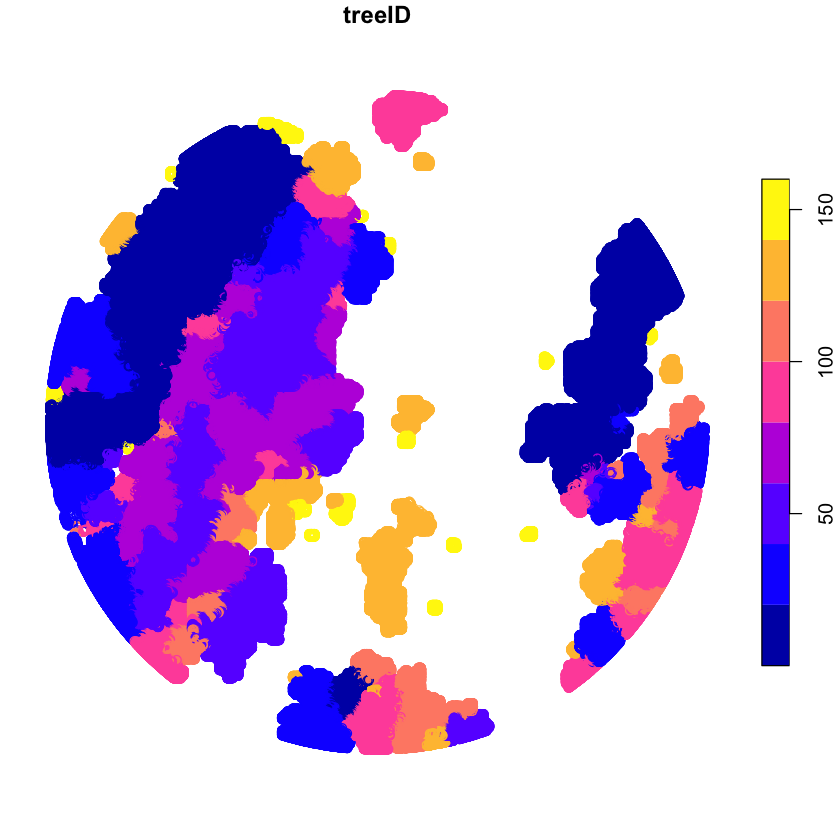

In [17]:
lsp = st_as_sf(as.spatial(trees))
plot(lsp[,"treeID"])

In [ ]:
lspdf = cbind(st_drop_geometry(lsp),st_coordinates(lsp))
head(lspdf)

In [18]:

## get max height of each tree
metrics <- tree_metrics(trees, ~list(z_max = max(Z)))
metrics.sf = st_as_sf(metrics)
head(metrics.sf)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



,treeID,z_max,geometry
,<dbl>,<dbl>,<POINT [m]>
1,1,37.35,POINT Z (68552.98 181508.2 ...
2,2,36.81,POINT Z (68558.89 181518.3 ...
3,3,36.68,POINT Z (68556.25 181511.4 ...
4,4,33.93,POINT Z (68561.84 181525 33...
5,5,33.19,POINT Z (68561.04 181521.4 ...
6,6,30.85,POINT Z (68557.48 181521.6 ...


In [21]:
print(metrics.sf)

Simple feature collection with 157 features and 2 fields
Geometry type: POINT
Dimension:     XYZ
Bounding box:  xmin: 68454.3 ymin: 181438.3 xmax: 68571.84 ymax: 181557.2
z_range:       zmin: 4.04 zmax: 37.35
Projected CRS: Tokyo / Japan Plane Rectangular CS IX
First 10 features:
   treeID z_max                       geometry
1       1 37.35 POINT Z (68552.98 181508.2 ...
2       2 36.81 POINT Z (68558.89 181518.3 ...
3       3 36.68 POINT Z (68556.25 181511.4 ...
4       4 33.93 POINT Z (68561.84 181525 33...
5       5 33.19 POINT Z (68561.04 181521.4 ...
6       6 30.85 POINT Z (68557.48 181521.6 ...
7       7 30.43 POINT Z (68565.11 181528.9 ...
8       8 24.58 POINT Z (68544.84 181496.6 ...
9       9 22.91 POINT Z (68468.49 181523.7 ...
10     10 21.96 POINT Z (68472.43 181523.7 ...


In [23]:
print(metrics)

                    coordinates treeID z_max
1   (68552.98, 181508.2, 37.35)      1 37.35
2   (68558.89, 181518.3, 36.81)      2 36.81
3   (68556.25, 181511.4, 36.68)      3 36.68
4     (68561.84, 181525, 33.93)      4 33.93
5   (68561.04, 181521.4, 33.19)      5 33.19
6   (68557.48, 181521.6, 30.85)      6 30.85
7   (68565.11, 181528.9, 30.43)      7 30.43
8   (68544.84, 181496.6, 24.58)      8 24.58
9   (68468.49, 181523.7, 22.91)      9 22.91
10  (68472.43, 181523.7, 21.96)     10 21.96
11  (68480.74, 181534.5, 21.89)     11 21.89
12  (68551.51, 181498.3, 21.35)     12 21.35
13  (68467.98, 181515.1, 20.85)     13 20.85
14   (68490.9, 181546.6, 20.19)     14 20.19
15   (68493.5, 181539.6, 19.53)     15 19.53
16  (68488.23, 181543.3, 19.22)     16 19.22
17  (68457.09, 181494.7, 19.09)     17 19.09
18  (68508.36, 181448.1, 18.92)     18 18.92
19   (68460.9, 181499.3, 18.75)     19 18.75
20  (68480.73, 181523.1, 18.71)     20 18.71
21    (68463.01, 181473, 18.36)     21 18.36
22   (6846

In [22]:
write.csv(metrics.sf, "Serigasawa/trees.csv")

## Testing differnt DTSM

In [2]:
output_folder <- "/Users/patricklucanas/Downloads/point_clouds/Ozakuzawa"
LASFILE <- "/Users/patricklucanas/Downloads/point_clouds/Ozakuzawa/orijinal.las"

# read las/laz file
las <- readLAS(glue("{LASFILE}"))

Warning message:
“Invalid header: X scale factors should be factor ten of 0.1 or 0.5 or 0.25 not 2.57479958356113e-07”
Warning message:
“Invalid header: Y scale factors should be factor ten of 0.1 or 0.5 or 0.25 not 2.04877462333472e-07”
Warning message:
“Invalid header: Z scale factors should be factor ten of 0.1 or 0.5 or 0.25 not 5.94733283200643e-08”
Warning message:
“Invalid data: 77768879 points with a return number equal to 0 found.”
Warning message:
“Invalid data: 77768879 points with a number of returns equal to 0 found.”


In [3]:
las <- classify_ground(las, algorithm = pmf(ws=5, th=3)) # adds classification of ground

# filter ground points
gnd <- filter_ground(las)

gnd@header@PHB[["X scale factor"]] <- 0.01
gnd@header@PHB[["Y scale factor"]] <- 0.01
gnd@header@PHB[["Z scale factor"]] <- 0.01
writeLAS(gnd, glue("{output_folder}/gnd_pmf.las"))

In [4]:
las_seg = readLAS("/Users/patricklucanas/Downloads/point_clouds/Ozakuzawa/ndsm_segmented.las")

Warning message:
“Invalid data: 77768879 points with a return number equal to 0 found.”
Warning message:
“Invalid data: 77768879 points with a number of returns equal to 0 found.”


In [6]:
metrics <- crown_metrics(las_seg, ~list(z_std = sd(Z), z_mean = mean(Z))) # calculate tree metrics
head(metrics)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



,treeID,z_std,z_mean,geometry
,<dbl>,<dbl>,<dbl>,<POINT [m]>
1,1,1.317201,0.9175972,POINT Z (68417.83 184401 4.04)
2,2,1.317879,0.2924265,POINT Z (68406.93 184398.8 ...
3,3,2.329449,1.9077752,POINT Z (68419 184396.6 6.16)
4,4,1.612152,1.9405785,POINT Z (68424 184396.5 4.99)
5,5,1.880697,1.4897468,POINT Z (68422.13 184396.2 ...
6,6,1.189990,1.0418182,POINT Z (68405.56 184395 2.9)


In [7]:
print(metrics)

Simple feature collection with 3356 features and 3 fields
Geometry type: POINT
Dimension:     XYZ
Bounding box:  xmin: 68294.94 ymin: 183978.7 xmax: 68831.75 ymax: 184401
z_range:       zmin: 2 zmax: 33.97
Projected CRS: JGD2011 / Japan Plane Rectangular CS IX
First 10 features:
   treeID      z_std    z_mean                       geometry
1       1 1.31720079 0.9175972 POINT Z (68417.83 184401 4.04)
2       2 1.31787905 0.2924265 POINT Z (68406.93 184398.8 ...
3       3 2.32944948 1.9077752  POINT Z (68419 184396.6 6.16)
4       4 1.61215157 1.9405785  POINT Z (68424 184396.5 4.99)
5       5 1.88069706 1.4897468 POINT Z (68422.13 184396.2 ...
6       6 1.18999007 1.0418182  POINT Z (68405.56 184395 2.9)
7       7 0.08563189 6.2258333 POINT Z (68428.45 184394.2 ...
8       8 1.07342242 0.1190566 POINT Z (68435.15 184393.4 ...
9       9 2.14258819 2.5880194 POINT Z (68429.78 184393.3 ...
10     10 0.86505185 0.5218003 POINT Z (68419.87 184392 2.39)


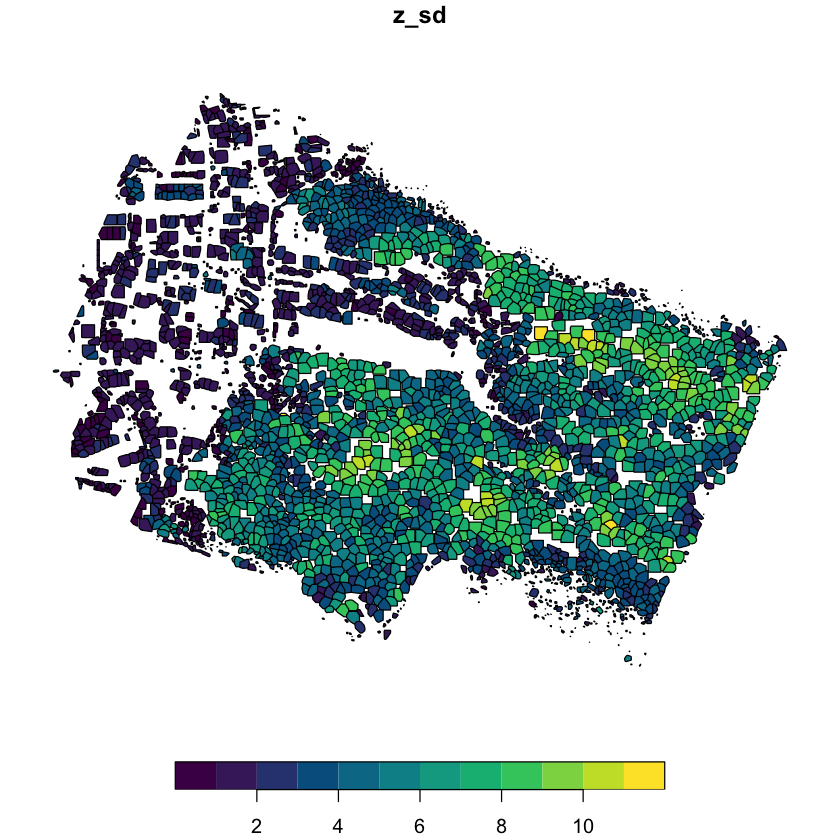

In [48]:
custom_crown_metrics <-function(z,i) {
    metrics <- list(
        z_max = max(z),
        z_sd = sd(z),
        z_mean = mean(z),
        z_min = min(z),
        i_mean = mean(i),
        i_sd = sd(i),
        i_max = max(i),
        i_min = min(i)
    )
    return(metrics)
}

ccm = ~custom_crown_metrics(z=Z, i = Intensity)
metrics <- crown_metrics(las_seg, func = ccm, geom = "convex")
plot(metrics['z_sd'], pal = hcl.colors)


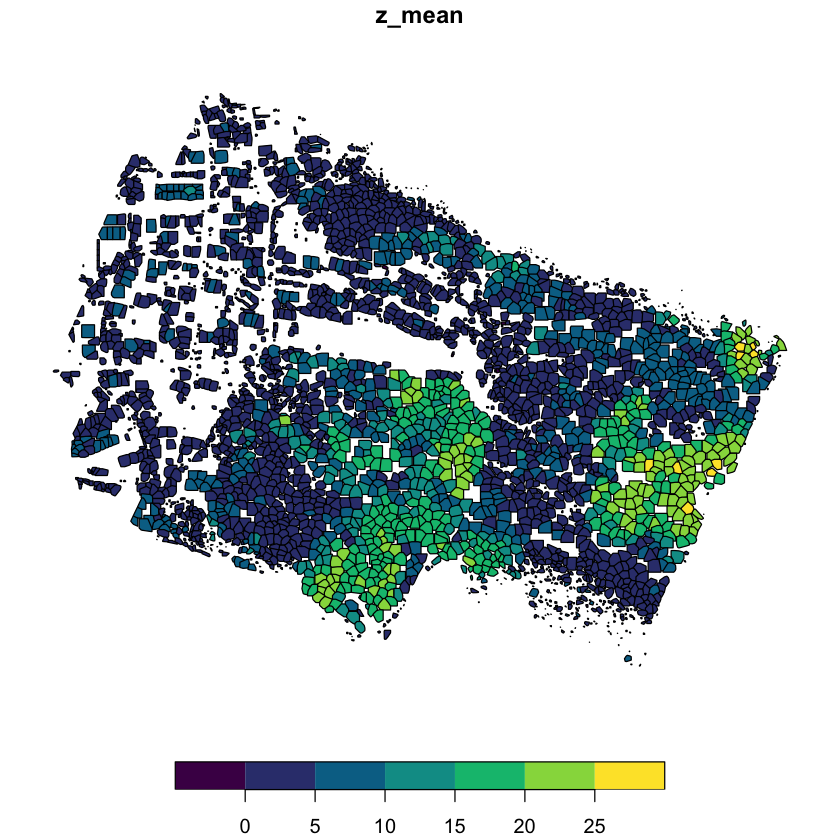

In [49]:
plot(metrics['z_mean'], pal = hcl.colors)

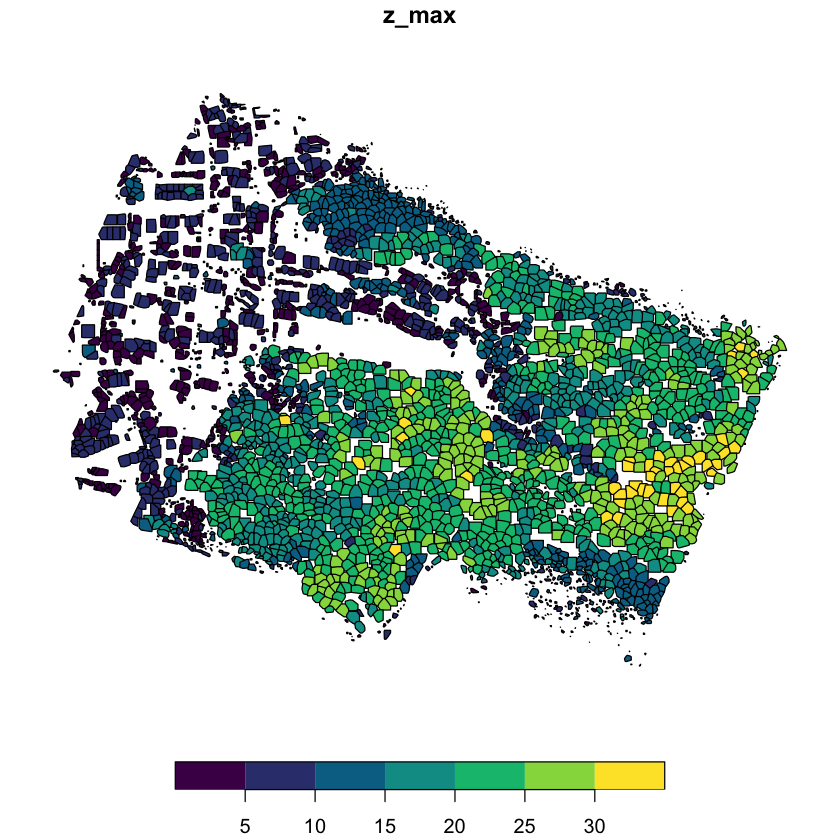

In [53]:
plot(metrics['z_max'],pal=hcl.colors)

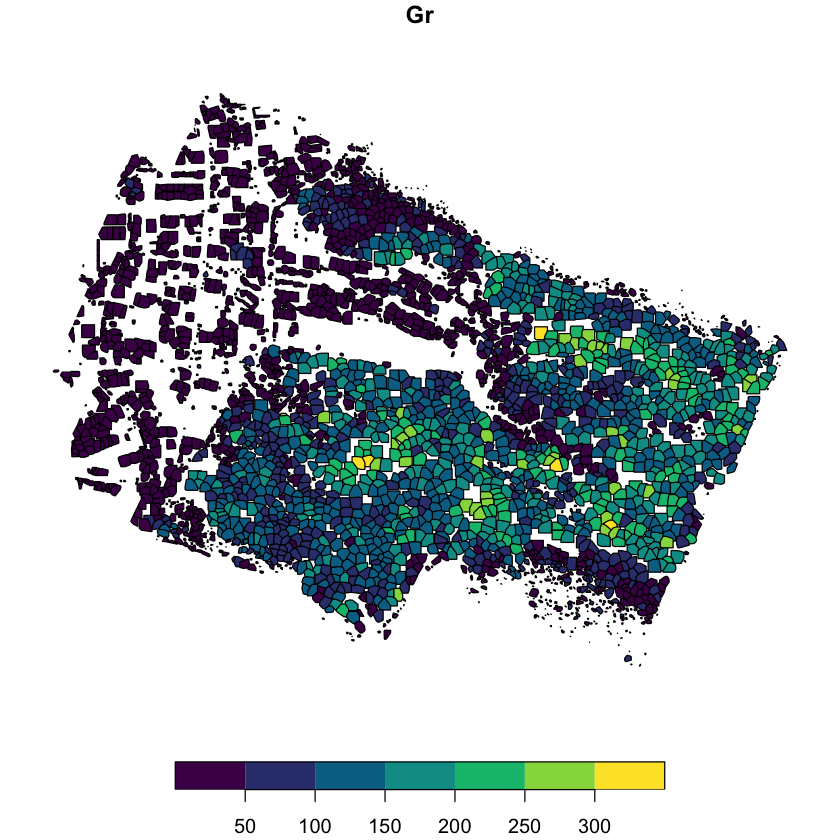

In [54]:
metrics$Gr <- metrics$z_max * metrics$z_sd
plot(metrics['Gr'],pal=hcl.colors)

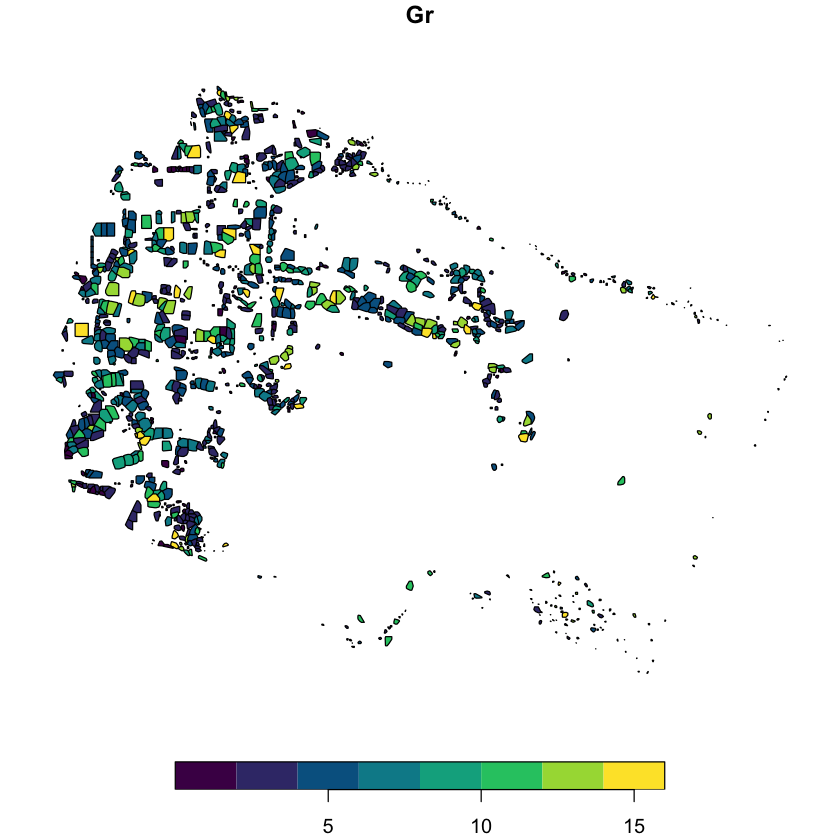

In [60]:
t_metrics <- metrics[metrics$Gr < 15,]
plot(t_metrics['Gr'],pal=hcl.colors)

In [15]:
plot(t_metrics, pal = hcl.colors)

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in plot_sf(x, ...): NA value(s) in bounding box. Trying to plot empty geometries?


In [23]:
t_metrics <- crown_metrics(las_seg, ~list(z_std=sd(Z)))
t_metrics <- t_metrics[t_metrics$z_std > 2.9,]
subset <- filter_poi(las_seg, treeID %in% t_metrics$treeID)
# x <- plot(las, bg = "white", size = 4)
# plot(subset, add = x + c(-100, 0), size = 5)

In [61]:
subset <- filter_poi(las_seg, treeID %in% t_metrics$treeID)
subset

class        : LAS (v1.2 format 2)
memory       : 420.2 Mb 
extent       : 68299.29, 68828.35, 183978, 184401.5 (xmin, xmax, ymin, ymax)
coord. ref.  : JGD2011 / Japan Plane Rectangular CS IX 
area         : 26516 m²
points       : 7.87 million points
density      : 296.75 points/m²

In [62]:
writeLAS(subset,"/Users/patricklucanas/Downloads/point_clouds/Ozakuzawa/subset_tree.las")

## Rooftop detection

In [63]:
las_seg_p <- segment_shapes(las_seg, shp_plane(k = 25), "planar")